# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [5]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = list(zip(lats, lngs))

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

lat_lngs[0:5]

[(-74.12993393876843, -169.25636397736616),
 (43.52777714593796, 9.493271571669396),
 (-46.140600767096544, 110.30003511085437),
 (-62.90623430128963, 141.97014580816597),
 (39.53566583577856, 2.5702608160514444)]

In [7]:
# Print the city count to confirm sufficient count
len(cities)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [8]:
#API call
url = "http://api.openweathermap.org/data/2.5/weather?APPID="

#collect info
City_Name=[]
City_ID=[]
City_Lat= []
City_Long=[]
Max_Temp=[]
Humidity=[]
Cloud_Cover=[]
Wind_Speed=[]
Country=[]
Date_Time=[]


In [9]:
#getting Json response
response= requests.get(f"{url}&q={city}").json()
response

{'coord': {'lon': 118.58, 'lat': -20.31},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 313.15,
  'pressure': 1012,
  'humidity': 11,
  'temp_min': 313.15,
  'temp_max': 313.15},
 'visibility': 10000,
 'wind': {'speed': 5.1, 'deg': 200},
 'clouds': {'all': 0},
 'dt': 1570163224,
 'sys': {'type': 1,
  'id': 9585,
  'message': 0.0061,
  'country': 'AU',
  'sunrise': 1570139092,
  'sunset': 1570183450},
 'timezone': 28800,
 'id': 2063042,
 'name': 'Port Hedland',
 'cod': 200}

In [10]:
#retrieve data, appending lists with random city
print(f"Beginning Data Retrieval")
print(f"-----------------------------------")
#loop through cities, API call
for city in cities:
     
    try:
        response= requests.get(f"{url}&q={city}").json()
        City_Name= (response["name"])
        City_ID.append(response["sys"]["id"])
        City_Lat.append(response["coord"]["lat"])
        City_Long.append(response["coord"]["lon"])
        Max_Temp.append(response["main"]["temp_max"])
        Humidity.append(response["main"]["humidity"])
        Cloud_Cover.append(response["clouds"]["all"])
        Wind_Speed.append(response["wind"]["speed"])
        Country.append(response["sys"]["country"])
        Date_Time.append(response["dt"])
        
        print(f"Processing Record {City_Name}")
        print(f"{url}&q={city}")
        
        
        time.sleep(1.01)
    
    except:
           print("City not found. Moving onto next...")
    
    continue

Beginning Data Retrieval
-----------------------------------
Processing Record Vaini
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=vaini
Processing Record La Spezia
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=la spezia
Processing Record Albany
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=albany
Processing Record Hobart
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=hobart
Processing Record Calvia
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=calvia
Processing Record Kapaa
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=kapaa
City not found. Moving onto next...
Processing Record Torbay
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=torbay
Processing Record Salto
http://api.openweathermap.org/data/2.

Processing Record Puerto Ayora
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=puerto ayora
Processing Record Oussouye
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=oussouye
Processing Record Petropavlovsk-Kamchatskiy
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=petropavlovsk-kamchatskiy
City not found. Moving onto next...
Processing Record Marfino
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=marfino
Processing Record Wanning
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=wanning
City not found. Moving onto next...
City not found. Moving onto next...
City not found. Moving onto next...
City not found. Moving onto next...
Processing Record Turayf
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=turayf
Processing Record Grindavik
http://api.ope

Processing Record Lebu
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=lebu
City not found. Moving onto next...
Processing Record Victoria
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=victoria
Processing Record Havre-Saint-Pierre
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=havre-saint-pierre
Processing Record Seminole
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=seminole
Processing Record Beisfjord
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=beisfjord
Processing Record Abu Dhabi
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=abu dhabi
Processing Record Castro
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=castro
City not found. Moving onto next...
City not found. Moving onto next...
Processing R

Processing Record Mwandiga
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=mwandiga
City not found. Moving onto next...
Processing Record Nara
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=nara
Processing Record Gat
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=gat
City not found. Moving onto next...
Processing Record College
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=college
City not found. Moving onto next...
City not found. Moving onto next...
City not found. Moving onto next...
Processing Record Flinders
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=flinders
City not found. Moving onto next...
Processing Record Necochea
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=necochea
City not found. Moving onto next...
Processing Record Sitka


City not found. Moving onto next...
City not found. Moving onto next...
Processing Record Ocean City
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=ocean city
City not found. Moving onto next...
Processing Record Hervey Bay
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=hervey bay
City not found. Moving onto next...
Processing Record Tarakan
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=tarakan
Processing Record Machilipatnam
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=machilipatnam
Processing Record Rincon
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=rincon
City not found. Moving onto next...
Processing Record Sibu
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=sibu
Processing Record Lahaina
http://api.openweathermap.org/data/2.5/weather

City not found. Moving onto next...
Processing Record Tautira
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=tautira
City not found. Moving onto next...
City not found. Moving onto next...
City not found. Moving onto next...
Processing Record Goderich
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=goderich
City not found. Moving onto next...
City not found. Moving onto next...
City not found. Moving onto next...
City not found. Moving onto next...
Processing Record Murillo
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=murillo
City not found. Moving onto next...
Processing Record Zvenigovo
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=zvenigovo
Processing Record Lamar
http://api.openweathermap.org/data/2.5/weather?APPID=94a835733f253154e2b164de4026cfc5&q=lamar
City not found. Moving onto next...
Processing Record Wuwei
http

In [11]:
City_Name

'Sao Gabriel da Cachoeira'

In [12]:
weather_api={"City Name": City_Name, "City ID": City_ID, "Latitude": City_Lat, "Longitude": City_Long,
             "Maximum Temperature": Max_Temp, "Humidity": Humidity, "Cloudiness": Cloud_Cover, 
             "Wind Speed": Wind_Speed, "Country": Country, "Date": Date_Time}




In [13]:
weather_api
weather_data=pd.DataFrame(weather_api)


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [14]:
weather_data.count()

City Name              277
City ID                277
Latitude               277
Longitude              277
Maximum Temperature    277
Humidity               277
Cloudiness             277
Wind Speed             277
Country                277
Date                   277
dtype: int64

In [15]:
weather_data

,City Name,City ID,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Sao Gabriel da Cachoeira,9229,15.34,74.49,298.15,78,40,0.60,IN,1570163224
1,Sao Gabriel da Cachoeira,6803,44.11,9.83,289.82,93,0,1.50,IT,1570163226
2,Sao Gabriel da Cachoeira,3273,42.65,-73.75,284.26,87,90,3.60,US,1570163163
3,Sao Gabriel da Cachoeira,9545,-42.88,147.33,287.59,54,40,9.80,AU,1570163097
4,Sao Gabriel da Cachoeira,9693,39.57,2.51,293.15,87,0,2.10,ES,1570163229
...,...,...,...,...,...,...,...,...,...,...
272,Sao Gabriel da Cachoeira,1515,54.08,-0.19,283.71,100,99,1.00,GB,1570163656
273,Sao Gabriel da Cachoeira,2018822,-29.36,-50.81,292.04,96,100,0.89,BR,1570163657
274,Sao Gabriel da Cachoeira,895,51.56,-101.90,275.15,93,20,2.60,CA,1570163659
275,Sao Gabriel da Cachoeira,9566,-34.85,139.16,305.15,21,0,6.70,AU,1570163661


In [20]:
weather_data.to_csv("CityData.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

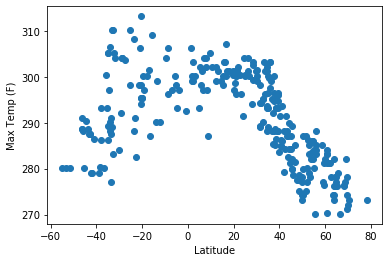

In [16]:
x_values = weather_data['Latitude']
y_values = weather_data['Maximum Temperature']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
plt.show()

In [21]:
plt.savefig('Lat_vs_Temp.png')

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Humidity Plot

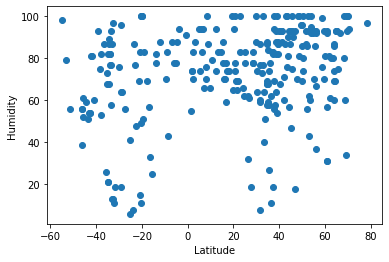

In [17]:
x_values = weather_data['Latitude']
y_values = weather_data['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

In [22]:
plt.savefig('Lat_vs_Hum.png')

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Cloudiness Plot

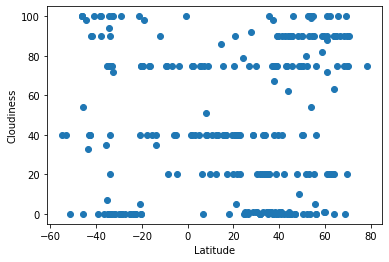

In [18]:
x_values = weather_data['Latitude']
y_values = weather_data['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

In [23]:
plt.savefig('CityLat_vs_Cloud.png')

<Figure size 432x288 with 0 Axes>

#### Latitude vs. Wind Speed Plot

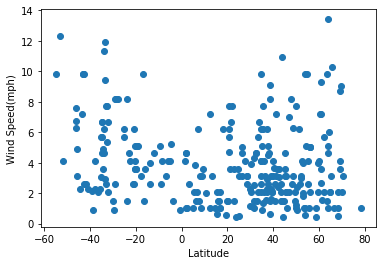

In [19]:
x_values = weather_data['Latitude']
y_values = weather_data['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph)')
plt.show()

In [24]:
plt.savefig('City_Lat_vs_Wind.png')

<Figure size 432x288 with 0 Axes>